<h1>Prediction Using Unsupervised ML </h1><h2>Task-2</h2>
<h3>Name:Ishita koradia</h3>

<h3>Importing libraries</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets



In [3]:
file="Iris.csv"
df=pd.read_csv(file)
print("File imported successfully")
df.head()

File imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h3>Using petal length and petal width for predicting clusters</h3>

In [4]:
df.drop(['Id','SepalLengthCm','SepalWidthCm'],axis=1,inplace=True)

<h3>Finding the optimum number of clusters using Elbow Method</h3>

In [10]:

from sklearn.cluster import KMeans
sse = []
k_range=range(1,11)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)
    print(km.inertia_)

550.6434666666671
86.40394533570999
31.38775897435898
19.499400899685114
13.93330875790876
11.10362366260479
9.23170102264885
7.713987301587302
6.588897992345818
5.554209336415217


<h3>Obtaining optimal values using k-means plot</h3>

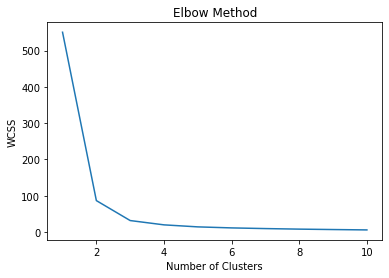

In [11]:
plt.plot(k_range,sse)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [15]:
         km=KMeans(n_clusters=3)
         y_predict=km.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
         y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<h3>Adding New Cluster</h3>

In [16]:
df['cluster']=y_predict

In [17]:
df.head()

,PetalLengthCm,PetalWidthCm,Species,cluster
0,1.4,0.2,Iris-setosa,2
1,1.4,0.2,Iris-setosa,2
2,1.3,0.2,Iris-setosa,2
3,1.5,0.2,Iris-setosa,2
4,1.4,0.2,Iris-setosa,2


In [18]:
df.cluster.unique()

array([2, 0, 1])

<h3>Storing Unique cluster in different dataframe</h3>

In [19]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

<h3>Plotting dataframe in single plot</h3>

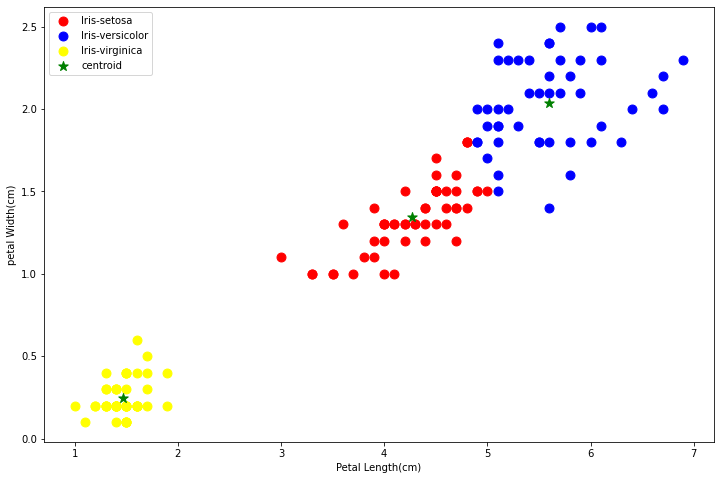

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='red',s=80,label='Iris-setosa')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='blue',s=80,label='Iris-versicolor')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='yellow',s=80,label='Iris-virginica')
plt.xlabel('Petal Length(cm)')
plt.ylabel('petal Width(cm)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='green',marker="*",s=100,label="centroid")
plt.legend()

In [26]:
#centrod of the 3 clusters
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [5.59583333, 2.0375    ],
       [1.464     , 0.244     ]])